<a href="https://colab.research.google.com/github/SruthiProject101-Hub/GuviDSProject/blob/main/Expense_Tracker_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Simulate Data Using Faker & Design the Database Schema**



**Installing Faker**

In [ ]:
pip install faker pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00


# This is not code, but a table schema description.  No syntax errors to correct.
- category (TEXT)
- payment_mode (TEXT)
- description (TEXT)
- amount_paid (REAL)
- cashback (REAL)


**Data Simulation**

In [ ]:
import sqlite3
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Setup
fake = Faker()
random.seed(42)
Faker.seed(42)

categories = [
    "Food", "Transportation", "Bills", "Subscriptions", "Entertainment",
    "Travel", "Groceries", "Personal Care", "Gifts", "Education"
]

payment_modes = ["Cash", "Online"]

descriptions = {
    "Food": ["Lunch at Anjappar's", "Dinner at BBQNation", "Café Coffee Day", "Swiggy delivery"],
    "Transportation": ["Uber ride", "Metro recharge", "Rapido", "Taxi Taxi"],
    "Bills": ["Electricity bill", "Water bill", "Internet bill", "Phone bill"],
    "Subscriptions": ["Netflix", "HotStar", "Amazon Prime", "YouTube Premium"],
    "Entertainment": ["Movie ticket", "Circus", "Amusement park", "Tennis"],
    "Travel": ["Flight ticket", "Hotel stay", "Train ticket", "Local transport"],
    "Groceries": ["Supermarket", "Online groceries", "Farmer's market", "Monthly stock"],
    "Personal Care": ["Parlour", "Hair Spa", "Shaving kit", "Skin care"],
    "Gifts": ["Birthday gift", "Anniversary gift", "Wedding present", "Baby Shower"],
    "Education": ["Online course", "Book purchase", "Exam fee", "Certifications"]
}

def generate_expenses(year=2025, entries=1200):
    data = []

    #Fixed: Indented the for loop with 4 spaces to align with the function definition
    for _ in range(entries):
        category = random.choice(categories)
        desc = random.choice(descriptions[category])
        # The faker.date_between function expects datetime objects for start_date and end_date.
        # Converting the year string to datetime objects:
        start_date = datetime(year, 1, 1)
        end_date = datetime(year, 12, 31)
        date = fake.date_between(start_date=start_date, end_date=end_date)
        amount = round(random.uniform(10, 500), 2)
        cashback = round(random.uniform(0, 20), 2) if random.random() < 0.3 else 0.0
        payment_mode = random.choice(payment_modes)

        data.append((date, category, payment_mode, desc, amount, cashback))

    return pd.DataFrame(data, columns=[
        "date", "category", "payment_mode", "description", "amount_paid", "cashback"
    ])

# Generate and preview
df = generate_expenses()
print(df.head())


         date        category payment_mode      description  amount_paid  \
0  2025-08-21  Transportation         Cash        Uber ride       373.36   
1  2025-01-10           Gifts         Cash    Birthday gift       299.34   
2  2025-04-11           Gifts       Online    Birthday gift       285.01   
3  2025-03-23   Subscriptions         Cash  YouTube Premium       298.74   
4  2025-09-26           Bills       Online       Phone bill       176.72   

   cashback  
0      2.79  
1      1.87  
2      0.00  
3      0.00  
4     19.14  


**SQL Table Creation and Data Insertion**

In [ ]:
# inserting data into the SQLite database (expenses.db) and creation of the expenses table
def create_db(df, db_name="expenses.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Create table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS expenses (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            date TEXT,
            category TEXT,
            payment_mode TEXT,
            description TEXT,
            amount_paid REAL,
            cashback REAL
        )
    ''')

    # Insert data
    df.to_sql("expenses", conn, if_exists="append", index=False)

    conn.commit()
    conn.close()

create_db(df)
print("Database created and data inserted successfully.")


Database created and data inserted successfully.


**Load the simulated data into the SQL database and create queries:**

*Setting Up Sqlite3 database connection and Helper function*

In [ ]:
import sqlite3

def run_query(query, db_name="expenses.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute(query)
        results = cursor.fetchall()
        cols = [description[0] for description in cursor.description]
    return pd.DataFrame(results, columns=cols)



**Install & Import Required Libraries to Visualise SQL queries**

In [ ]:
!pip install seaborn matplotlib --quiet
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-10-e45d72fdac90>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='total_spent', y='category', palette='viridis')


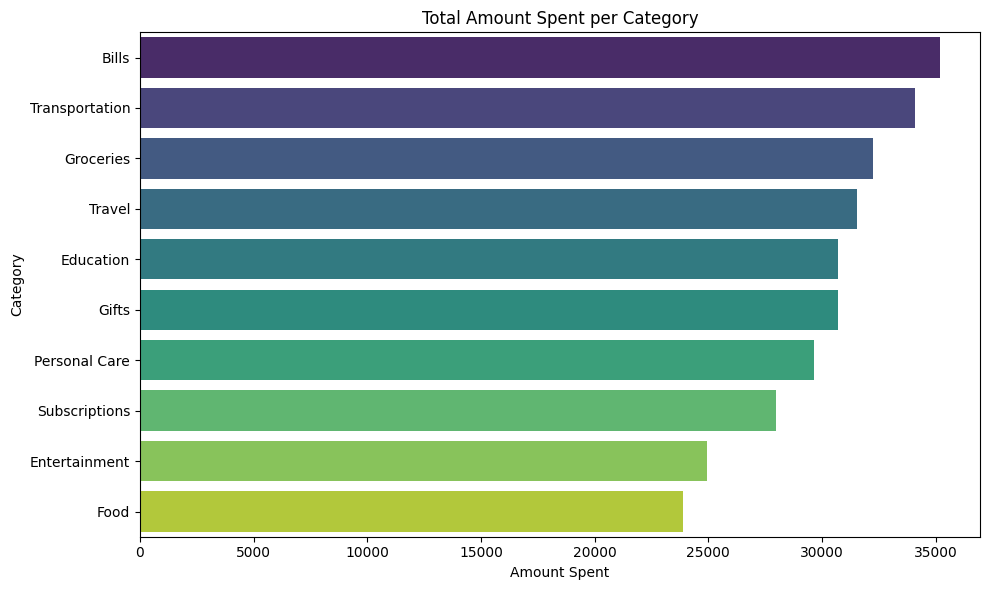

In [ ]:
# Install visualization libraries (only need to run once)
!pip install seaborn matplotlib --quiet

# 📦 Import required modules
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Define the helper function for SQL query execution
def run_query(query, db_name="expenses.db"):
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()
        cursor.execute(query)
        results = cursor.fetchall()
        cols = [description[0] for description in cursor.description]
    return pd.DataFrame(results, columns=cols)

# 📌 Query 1: Total amount spent in each category
query1 = """
SELECT category, SUM(amount_paid) AS total_spent
FROM expenses
GROUP BY category
ORDER BY total_spent DESC;
"""

# 🧾 Run the query and store result in df1
df1 = run_query(query1)

# 📊 Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='total_spent', y='category', palette='viridis')
plt.title("Total Amount Spent per Category")
plt.xlabel("Amount Spent")
plt.ylabel("Category")
plt.tight_layout()
plt.show()




Query 2

<ipython-input-11-51f73f838255>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='payment_mode', y='total_spent', palette='crest')


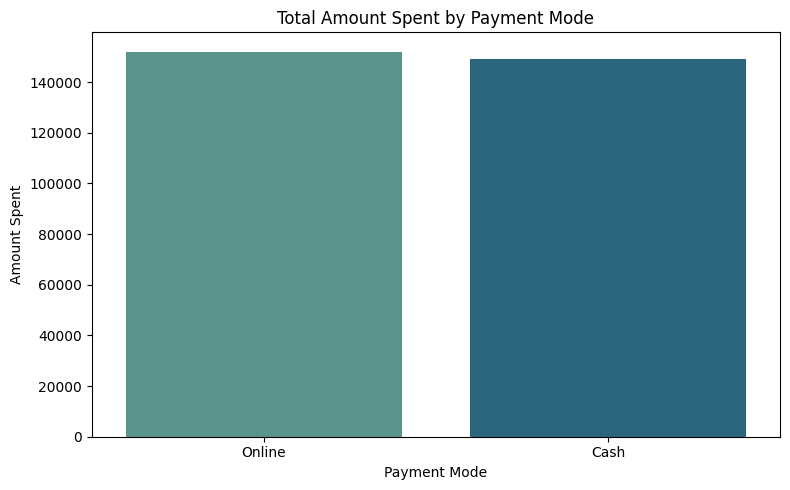

In [ ]:
# 📌 Query 2: Total amount spent using each payment mode
query2 = """
SELECT payment_mode, SUM(amount_paid) AS total_spent
FROM expenses
GROUP BY payment_mode
ORDER BY total_spent DESC;
"""

# 🧾 Run the query and store the result in df2
df2 = run_query(query2)
df2

plt.figure(figsize=(8, 5))
sns.barplot(data=df2, x='payment_mode', y='total_spent', palette='crest')
plt.title("Total Amount Spent by Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Amount Spent")
plt.tight_layout()
plt.show()


**Query 3**

In [ ]:
# 📌 Query 3: Total cashback received across all transactions
query3 = """
SELECT SUM(cashback) AS total_cashback
FROM expenses;
"""

# 🧾 Run the query and store the result in df3
df3 = run_query(query3)
df3

print(f"💰 Total Cashback Received: ${df3['total_cashback'][0]:,.2f}")


💰 Total Cashback Received: $7,258.16


<ipython-input-26-d722ef2c6aa5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, x='total_spent', y='category', palette='mako')


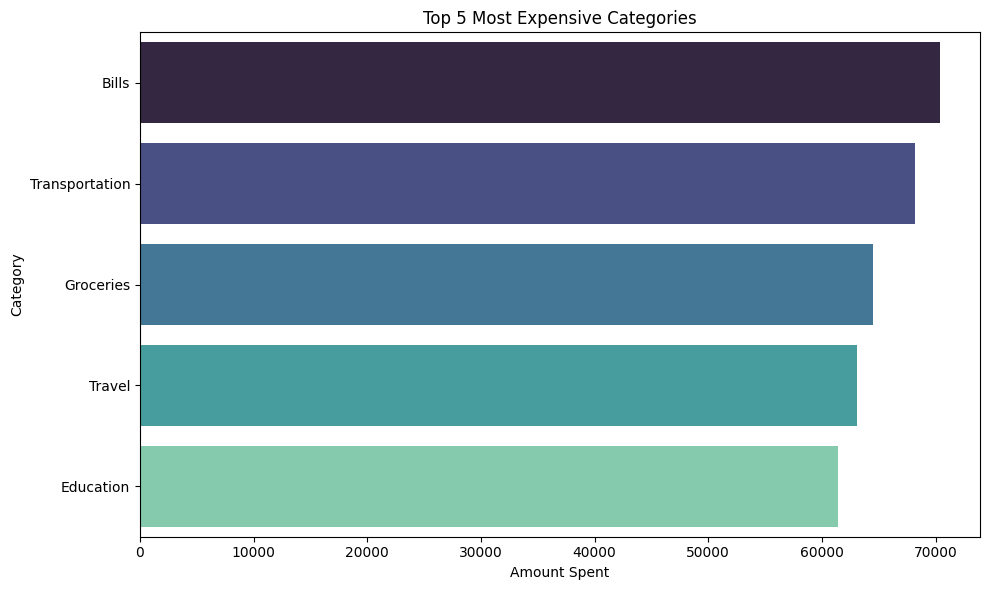

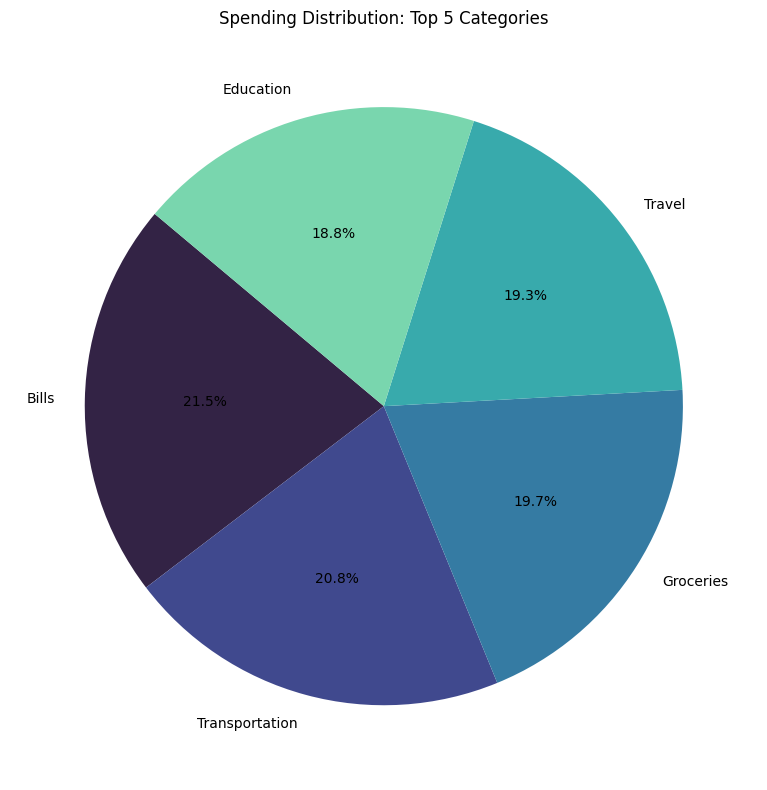

In [ ]:
# 📌 Query 4: Top 5 Most Expensive Categories by Total Spends
query4 = """
SELECT category, SUM(amount_paid) AS total_spent
FROM expenses
GROUP BY category
ORDER BY total_spent DESC
LIMIT 5;
"""

df4 = run_query(query4)
df4

plt.figure(figsize=(10, 6))
sns.barplot(data=df4, x='total_spent', y='category', palette='mako')
plt.title("Top 5 Most Expensive Categories")
plt.xlabel("Amount Spent")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df4['total_spent'], labels=df4['category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', len(df4)))
plt.title("Spending Distribution: Top 5 Categories")
plt.tight_layout()
plt.show()


**Query 5**

<ipython-input-29-7c8b024c1c8c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x='payment_mode', y='total_spent', palette='flare')


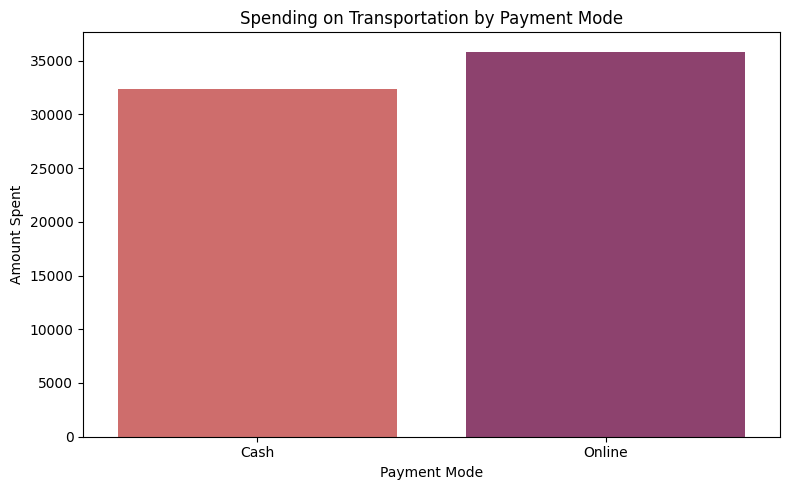

In [ ]:
# 📌 Query 5: Expense on transportation using different payment modes
query5 = """
SELECT payment_mode, SUM(amount_paid) AS total_spent
FROM expenses
WHERE category = 'Transportation'
GROUP BY payment_mode;
"""

df5 = run_query(query5)
df5

plt.figure(figsize=(8, 5))
sns.barplot(data=df5, x='payment_mode', y='total_spent', palette='flare')
plt.title("Spending on Transportation by Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Amount Spent")
plt.tight_layout()
plt.show()


**Query 6**

<ipython-input-30-65b34db2e422>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df6, x='category', order=df6['category'].value_counts().index, palette='viridis')


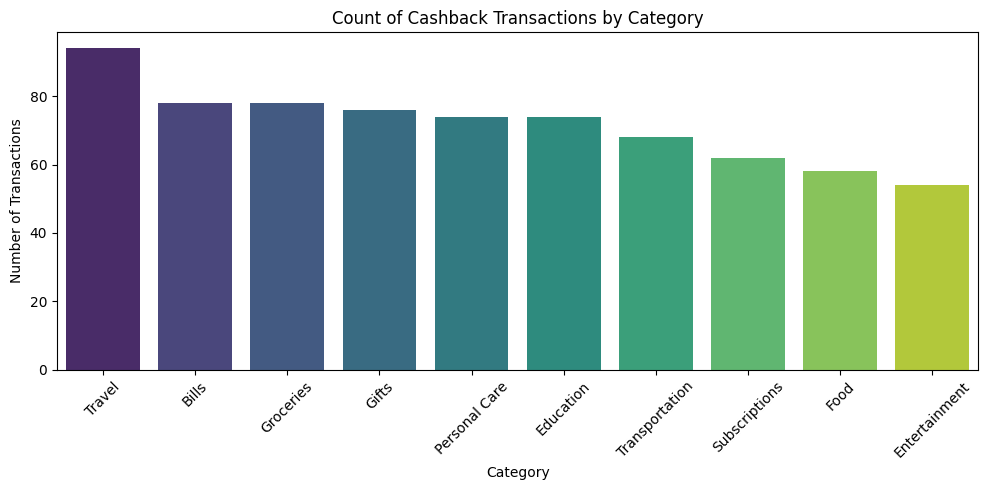

In [ ]:
# 📌 Query 6: Transactions that resulted in Cashback
query6 = """
SELECT *
FROM expenses
WHERE cashback > 0;
"""

df6 = run_query(query6)
df6.head()  # Display first few rows

#Visualisation to understand where most cashback occurred
plt.figure(figsize=(10, 5))
sns.countplot(data=df6, x='category', order=df6['category'].value_counts().index, palette='viridis')
plt.title("Count of Cashback Transactions by Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Query 7**

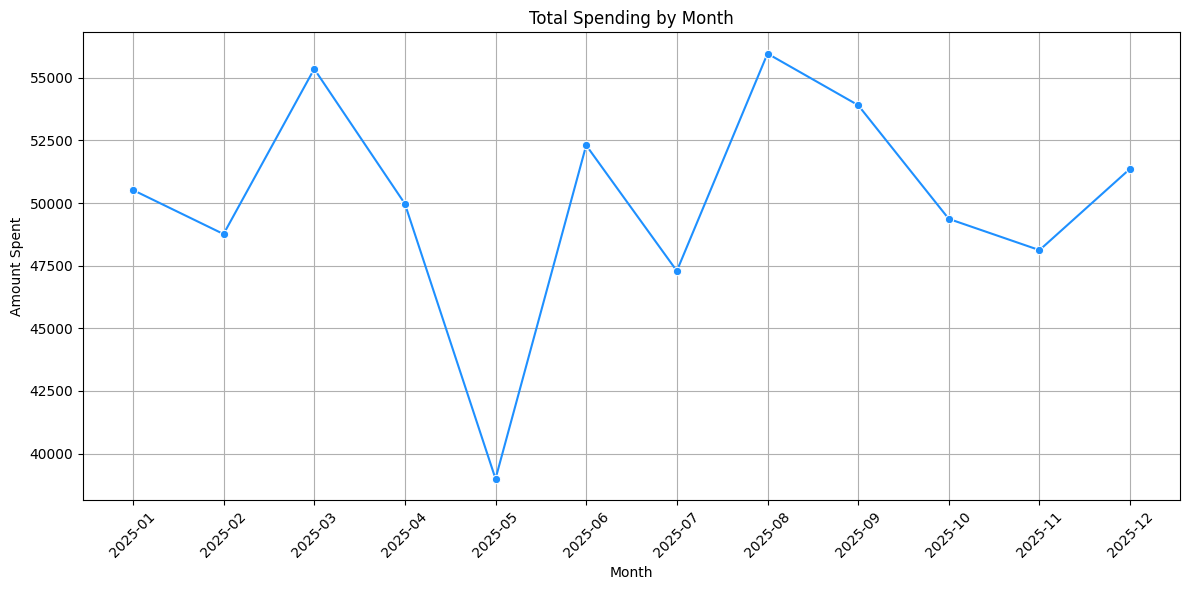

In [ ]:
# 📌 Query 7: Monthly Total Spending
query7 = """
SELECT strftime('%Y-%m', date) AS month, SUM(amount_paid) AS total_spent
FROM expenses
GROUP BY month
ORDER BY month;
"""

df7 = run_query(query7)
df7

plt.figure(figsize=(12, 6))
sns.lineplot(data=df7, x='month', y='total_spent', marker='o', color='dodgerblue')
plt.title("Total Spending by Month")
plt.xlabel("Month")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Query 8**

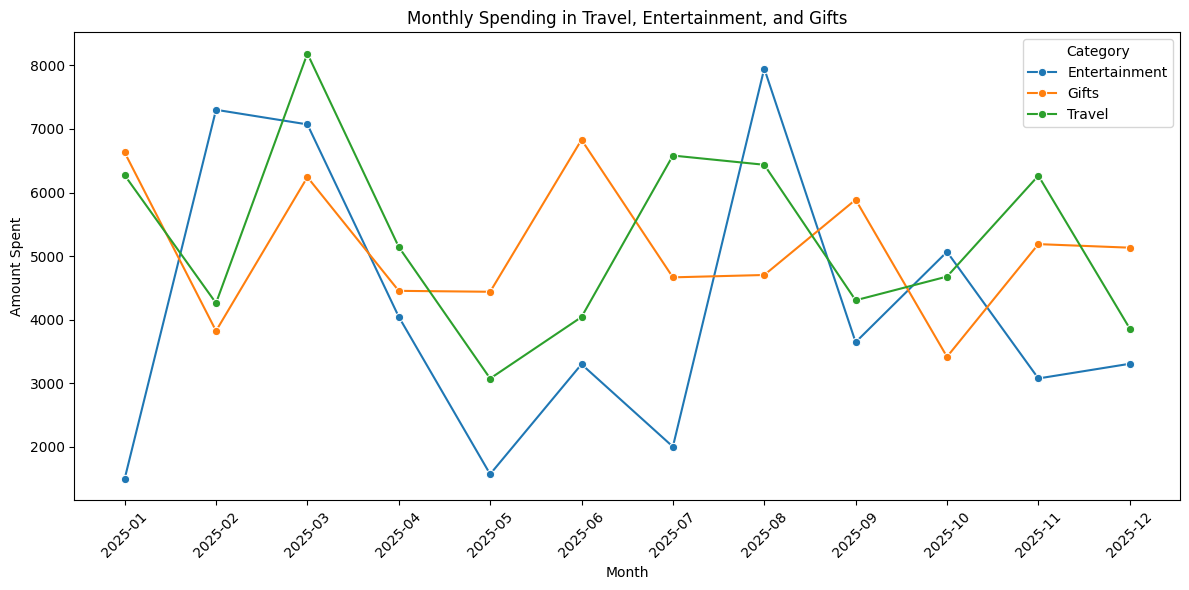

In [ ]:
# 📌 Query 8: Highest Monthly Spending in Select Categories
query8 = """
SELECT strftime('%Y-%m', date) AS month, category, SUM(amount_paid) AS total_spent
FROM expenses
WHERE category IN ('Travel', 'Entertainment', 'Gifts')
GROUP BY month, category
ORDER BY month, category;
"""

df8 = run_query(query8)
df8

plt.figure(figsize=(12, 6))
sns.lineplot(data=df8, x='month', y='total_spent', hue='category', marker='o')
plt.title("Monthly Spending in Travel, Entertainment, and Gifts")
plt.xlabel("Month")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


**Query 9**

In [ ]:
run_query("SELECT DISTINCT category FROM expenses;")


,category
0,Transportation
1,Gifts
2,Subscriptions
3,Bills
4,Education
5,Groceries
6,Travel
7,Personal Care
8,Food
9,Entertainment


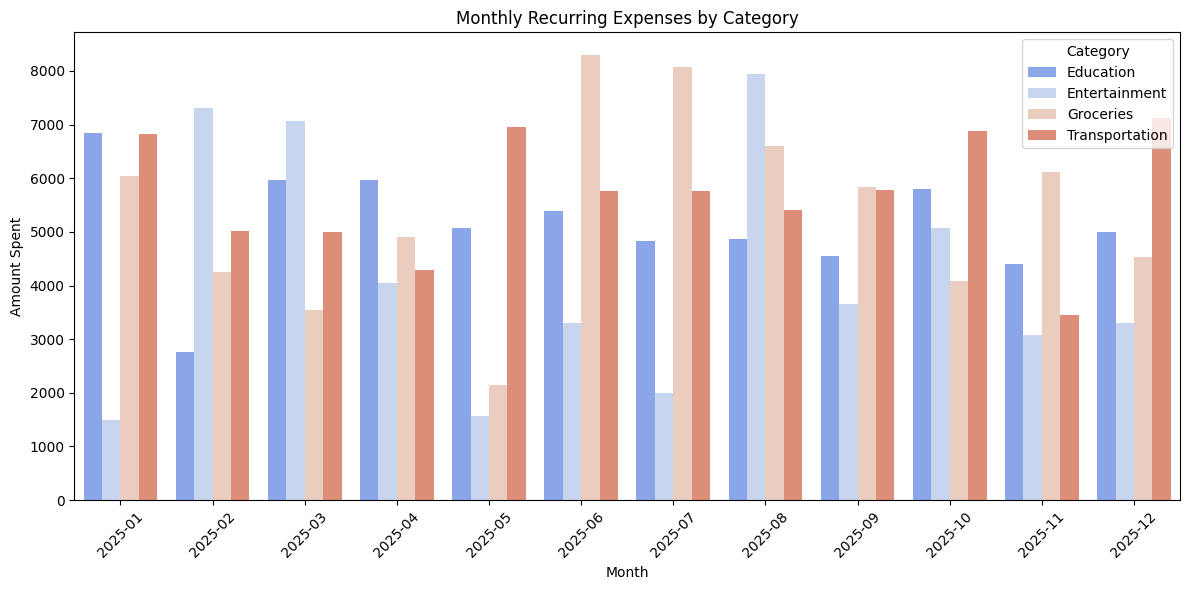

In [ ]:
# 📌 Query 9: Monthly Recurring Expenses by Category
query9 = """
SELECT strftime('%Y-%m', date) AS month, category, SUM(amount_paid) AS total_spent
FROM expenses
WHERE category IN ('Transportation', 'Entertainment', 'Groceries', 'Education')
GROUP BY month, category
ORDER BY month, category;
"""

df9 = run_query(query9)
df9

plt.figure(figsize=(12, 6))
sns.barplot(data=df9, x='month', y='total_spent', hue='category', palette='coolwarm')
plt.title("Monthly Recurring Expenses by Category")
plt.xlabel("Month")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


**Query 10**

<ipython-input-36-63df8b6e5b48>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df10, x='month', y='total_cashback', palette='crest')


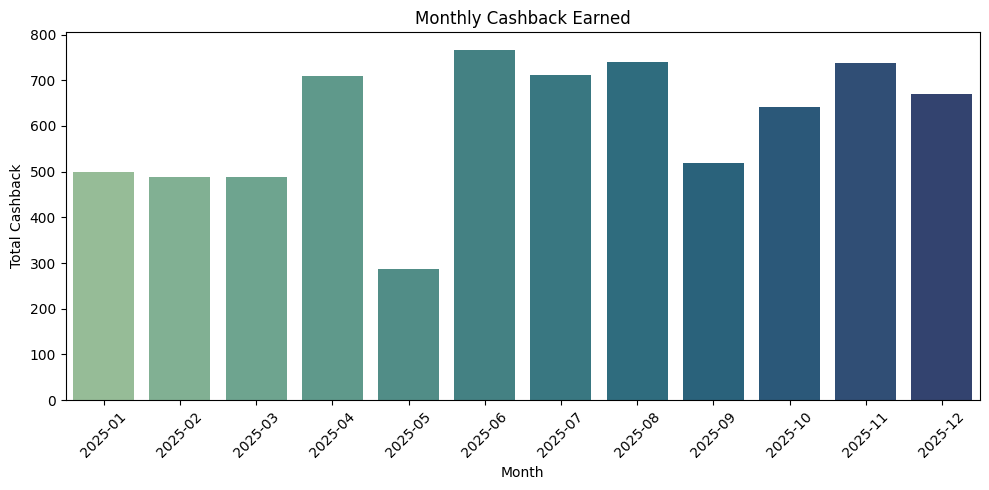

In [ ]:
# 📌 Query 10: Monthly Cashback or Rewards Earned
query10 = """
SELECT strftime('%Y-%m', date) AS month, SUM(cashback) AS total_cashback
FROM expenses
GROUP BY month
ORDER BY month;
"""

df10 = run_query(query10)
df10

plt.figure(figsize=(10, 5))
sns.barplot(data=df10, x='month', y='total_cashback', palette='crest')
plt.title("Monthly Cashback Earned")
plt.xlabel("Month")
plt.ylabel("Total Cashback")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Query 11**

In [ ]:
# 📌 Query 11: Overall Spending Trend Over Time
query11 = """
SELECT strftime('%Y-%m', date) AS month, SUM(amount_paid) AS total_spent
FROM expenses
GROUP BY month
ORDER BY month;
"""


df11 = run_query(query11)
df11

print(df11.shape)
print(df11.head())


(12, 2)
     month  total_spent
0  2025-01     50519.78
1  2025-02     48760.70
2  2025-03     55353.12
3  2025-04     49971.38
4  2025-05     38991.44


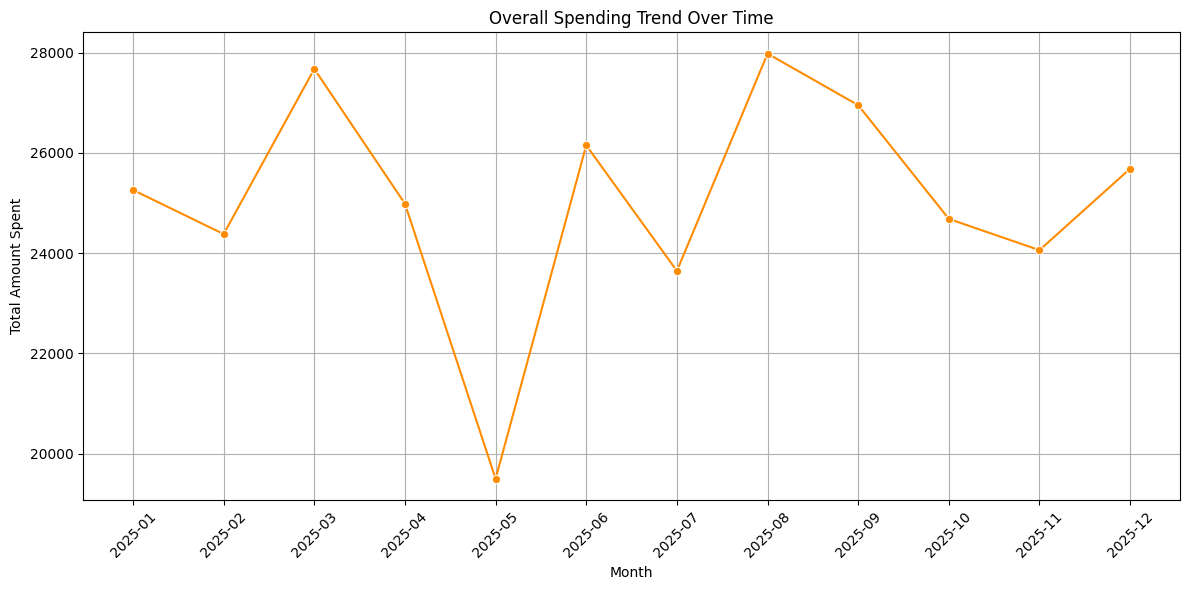

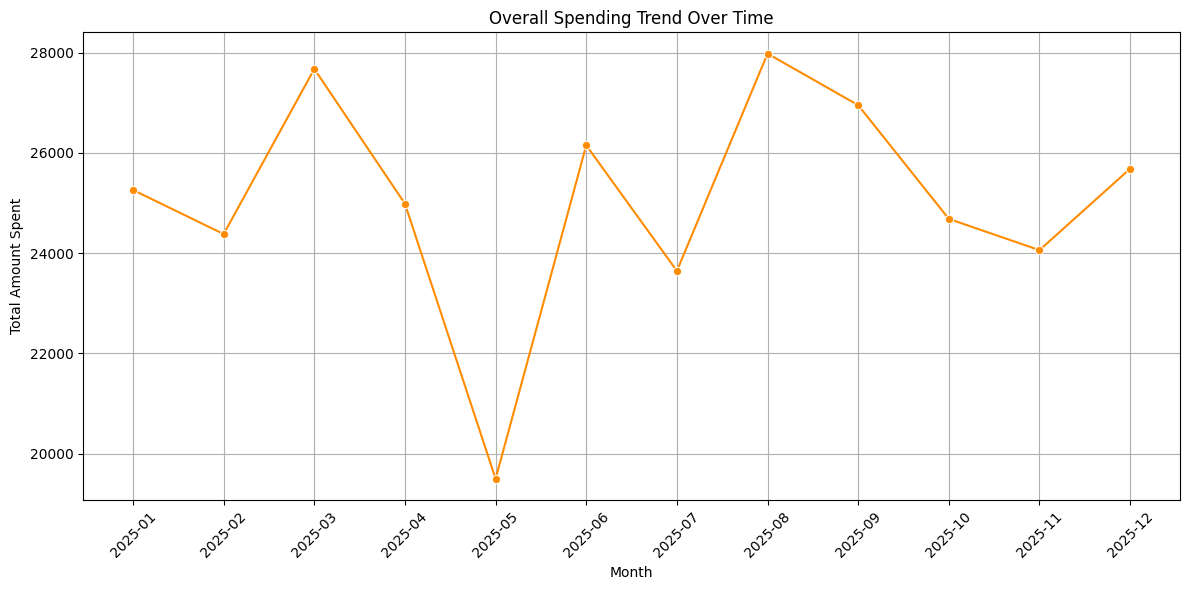

In [ ]:
# 📌 Query 11: Overall Spending Trend Over Time
query11 = """
SELECT strftime('%Y-%m', date) AS month, SUM(amount_paid) AS total_spent
FROM expenses
GROUP BY month
ORDER BY month;
"""
df11 = run_query(query11)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df11, x='month', y='total_spent', marker='o', color='darkorange')
plt.title("Overall Spending Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df11 = run_query(query11)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df11, x='month', y='total_spent', marker='o', color='darkorange')
plt.title("Overall Spending Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Query 12**

<ipython-input-13-1927efa16c0f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df12, x='travel_type', y='avg_cost', palette='Set2')


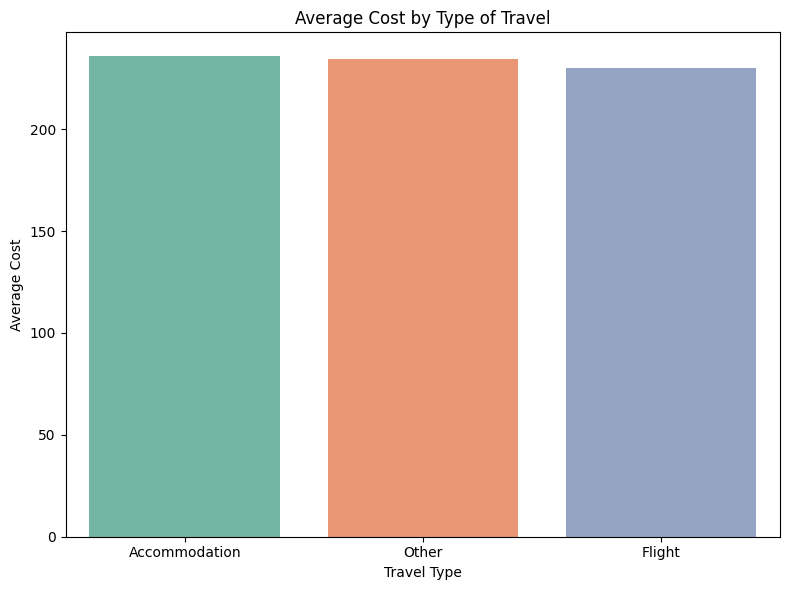

In [ ]:
# 📌 Query 12: Cost Associated with Different Travel Types
query12 = """
SELECT
    CASE
        WHEN LOWER(description) LIKE '%flight%' THEN 'Flight'
        WHEN LOWER(description) LIKE '%hotel%' OR LOWER(description) LIKE '%stay%' THEN 'Accommodation'
        WHEN LOWER(description) LIKE '%taxi%' OR LOWER(description) LIKE '%cab%' OR LOWER(description) LIKE '%bus%' THEN 'Transportation'
        ELSE 'Other'
    END AS travel_type,
    ROUND(AVG(amount_paid), 2) AS avg_cost,
    COUNT(*) AS transaction_count
FROM expenses
WHERE category = 'Travel'
GROUP BY travel_type
ORDER BY avg_cost DESC;
"""

df12 = run_query(query12)
df12

plt.figure(figsize=(8, 6))
sns.barplot(data=df12, x='travel_type', y='avg_cost', palette='Set2')
plt.title("Average Cost by Type of Travel")
plt.xlabel("Travel Type")
plt.ylabel("Average Cost")
plt.tight_layout()
plt.show()

**Query 13**

<ipython-input-16-255808f4eede>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df13a, x='day_type', y='total_spent', palette='autumn')


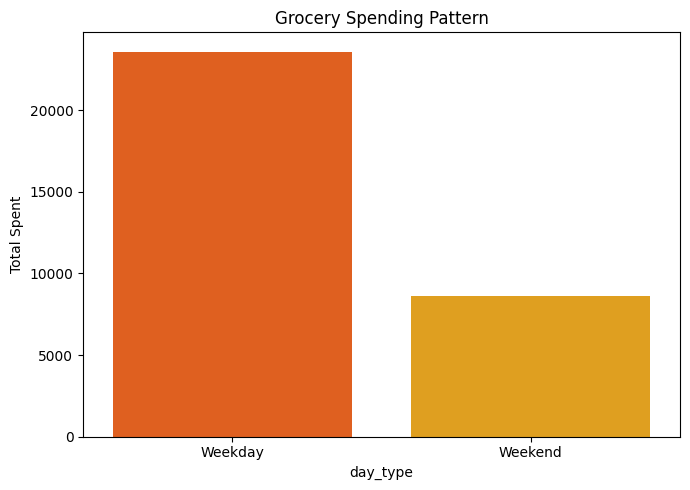

In [ ]:
# 📌 Query 13A: Grocery Spending Patterns
query13a = """
SELECT
    CASE
        WHEN strftime('%w', date) IN ('0', '6') THEN 'Weekend'
        ELSE 'Weekday'
    END AS day_type,
    ROUND(SUM(amount_paid), 2) AS total_spent
FROM expenses
WHERE category = 'Groceries'
GROUP BY day_type;
"""

df13a = run_query(query13a)
df13a

plt.figure(figsize=(7, 5))
sns.barplot(data=df13a, x='day_type', y='total_spent', palette='autumn')
plt.title("Grocery Spending Pattern")
plt.ylabel("Total Spent")
plt.xlabel("day_type")
plt.tight_layout()
plt.show()

**Query 14**

In [ ]:
#We’ll define:

#High priority = categories with spending above average

#Low priority = categories with spending below or equal to average

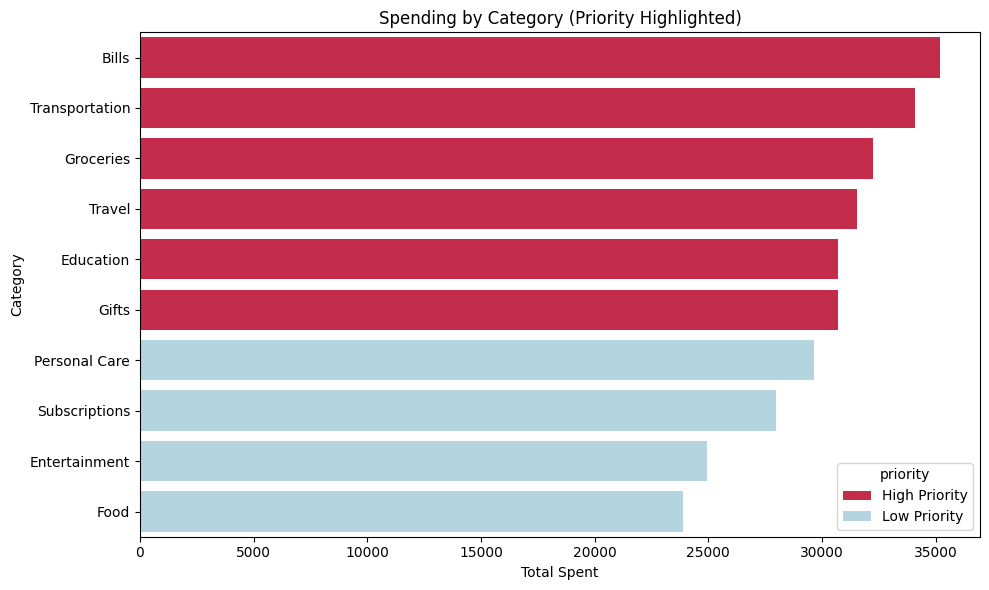

In [ ]:
# query14: Defining High and Low priority Categories:
query14 = """
WITH category_totals AS (
    SELECT category, SUM(amount_paid) AS total_spent
    FROM expenses
    GROUP BY category
),
avg_spend AS (
    SELECT AVG(total_spent) AS avg_spending
    FROM category_totals
)
SELECT
    c.category,
    ROUND(c.total_spent, 2) AS total_spent,
    CASE
        WHEN c.total_spent > a.avg_spending THEN 'High Priority'
        ELSE 'Low Priority'
    END AS priority
FROM category_totals c, avg_spend a
ORDER BY total_spent DESC;
"""

df14 = run_query(query14)
df14

plt.figure(figsize=(10, 6))
sns.barplot(data=df14, x='total_spent', y='category', hue='priority', dodge=False, palette={'High Priority': 'crimson', 'Low Priority': 'lightblue'})
plt.title("Spending by Category (Priority Highlighted)")
plt.xlabel("Total Spent")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

**Query 15**

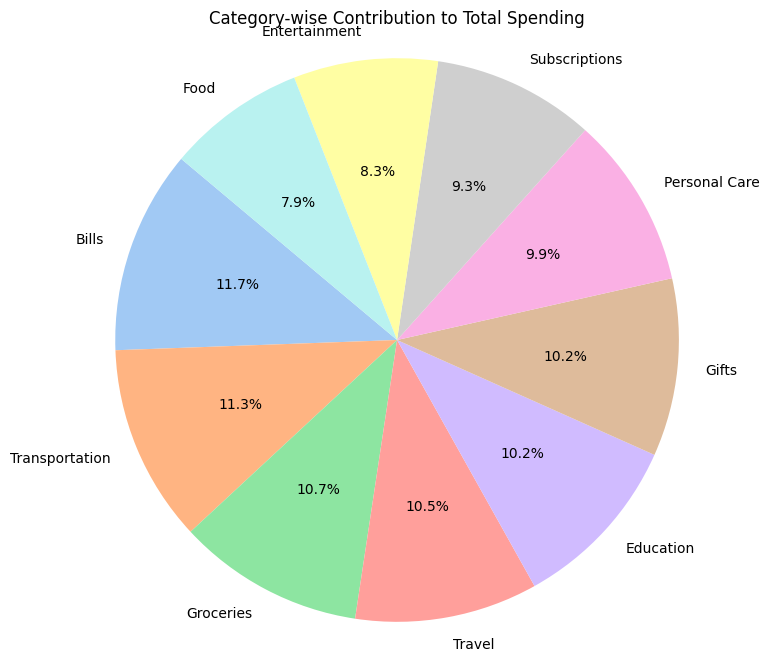

In [ ]:
# Query 15: Category Contributing Highest % of Total Spending
query15 = """
WITH total AS (
    SELECT SUM(amount_paid) AS grand_total
    FROM expenses
)
SELECT
    category,
    ROUND(SUM(amount_paid), 2) AS total_spent,
    ROUND((SUM(amount_paid) * 100.0) / (SELECT grand_total FROM total), 2) AS percent_of_total
FROM expenses
GROUP BY category
ORDER BY percent_of_total DESC;
"""

df15 = run_query(query15)
df15

plt.figure(figsize=(8, 8))
plt.pie(df15['percent_of_total'], labels=df15['category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Category-wise Contribution to Total Spending")
plt.axis('equal')
plt.show()


In [ ]:
from google.colab import files
files.download("expenses.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>